 # How to build Multi Tenant Applications in Metal

Use metadata filters to serve different data to different users based on their preferences, needs, or access rights.
For example, one company wants to let only certain employees access specific documents. Another wants to show customers only relevant and available products. By using filters, we guarantee users see only what is relevant to them.


In [ ]:
!pip install -qU metal-sdk==2.1.0
!pip install python-dotenv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


## Step 1: Define the Metadata Schema

Head over to your Metal [Dashboard](https://app.getmetal.io/), create an Index and include the Metadata filters.

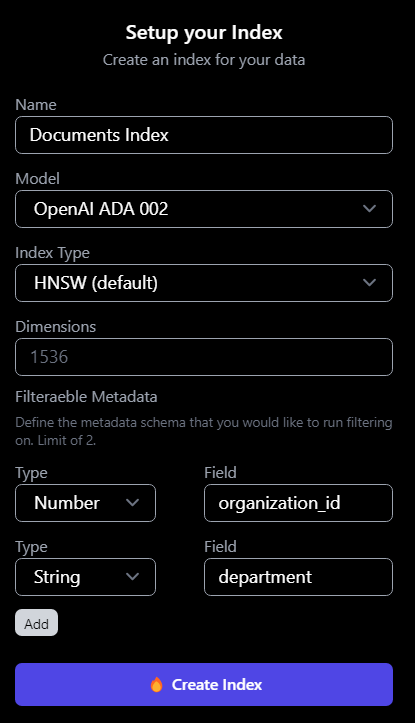

Now let's initialize our connection to Metal with the Index Id, client Id and API key.

In [ ]:
import os
from metal_sdk.metal import Metal
from dotenv import load_dotenv
load_dotenv()

api_key= os.environ['METAL_API_KEY']
client_id= os.environ['METAL_CLIENT_ID']
index_id = os.environ['METAL_INDEX_ID']

metal = Metal(api_key, client_id, index_id)



## Step 2: Add Metadata to your documents

In [ ]:
metal.index({
    'text': 'Onboarding and orientation program',
    'metadata': {
        'organization_id':1,
        'department': 'sales'
    }
})

In [ ]:
metal.index({
    'text': 'Onboarding and orientation program',
    'metadata': {
        'organization_id':2,
        'department': 'engineering'
    }
})

## Step 3: Query your documents

 Apply metadata filters using the filter parameter to query your documents

In [ ]:
results = metal.search({
    'text': 'Onboarding',
    "filters": { "and": [{
        "field": "organization_id",
        "value": 2,
        "operator":"eq"},
         {
        "field": "department",
        "value": 'engineering',
        "operator":"eq"
         }]}
})

print(results)